# АБ филтер

### Краток опис

Во оваа дигитална тетратка ќе го разработиме функционирањето на АБ филтерот кај крајно упростен пример на возило ограничено да се движи во 1 димензија. На возилото нека биде монтиран некој сензор кој ќе ја мери далечина од возилото до најблискиот објект. На сликата е автомобил со ваква опрема,

In [1]:
# Слика од кола со ЛИДАР

а ние ќе замислиме дека нашиот ограничен свет функционира вака

In [2]:
# Слика од кола со ЛИДАР 1Д

In [3]:
import numpy as np
import plotly.offline as pl
import plotly.graph_objs as go
from ipywidgets import interact

In [4]:
pl.init_notebook_mode(connected=True)

### Почеток

За конструкциската изведба на сензорот нема да зборуваме, едноставно само ќе го моделираме сензорот како уред кој ќе ни даде проценета вредност до најблискиот предмет. Сензорот ги дава информациите за далечината во дигитален облик и на одредено време. Ние ги прибираме тие податоци и врз таа основа правиме проценка за нашата позиција во светот.

Да почнеме со пример каде автомобилот стои во место и ја мери далечината до еден ѕид. Нека резолуцијата на сензорот е 0.1 метар. Прибираме податок од сензорот и отчитуваме 7.4 метри. Ако повторно отчитаме најверојатно ќе добиеме поразлична вредност за далечината. На пример, добиваме 7.7 метри. Ова е очекувано бидејќи секој сензор е реален систем и има одредена прецизност во мерењето. Ако пак отчитаме вредноста може да добиеме и 7.3 метри. Оваа неодреденост во мерењето ја нарекуваме шум. Сензорот да немаше шум, во секој момент ќе ја знаевме позицијата на автомобилот. Вака кога има шум потребно да се искористи инженерство за да се искористи информацијата која ја дава сензорот со тој шум. Нека тој шум го поставиме на ±0.5 метри. Да ја исцртаме грешката на график.

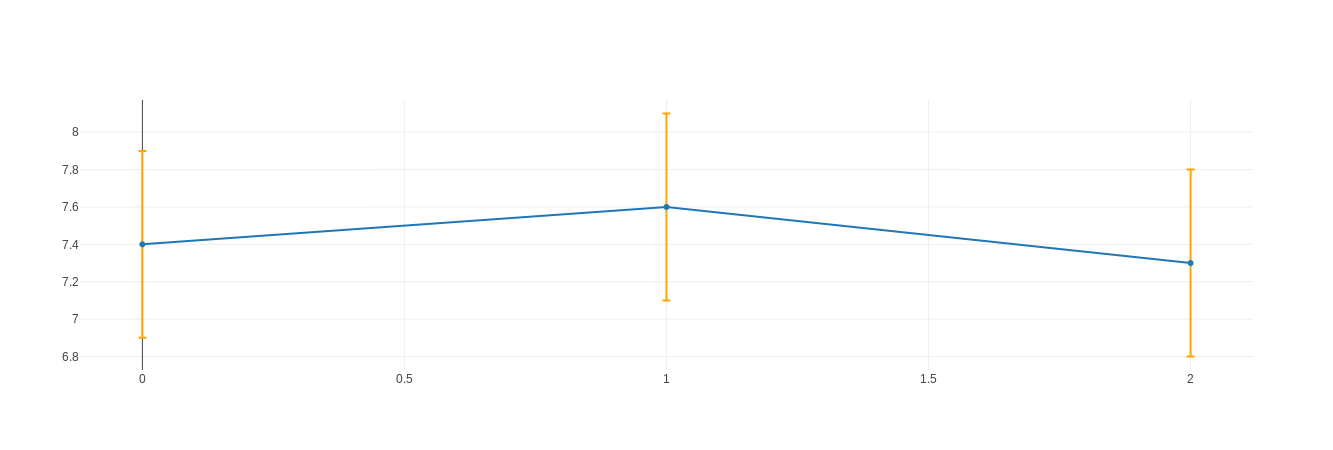

In [5]:
def plot_sensor_error(measurements, sensor_noise):
    data = [
        go.Scatter(
            x=np.arange(len(measurements)),
            y=measurements,
            error_y=dict(type='data', array=[sensor_noise] * len(measurements), color='orange', visible=True)
        )
    ]
    pl.iplot(data)

sensor_noise = 0.5
measurements = [7.4, 7.6, 7.3]
plot_sensor_error(measurements, sensor_noise)

Еден начин да добиеме што подобар резултат е да прибереме многу мерења и потоа да најдеме средна вредност. На некој начин вака би го намалиле влијанието на шумот кој ни ги мати пресметките, но тоа ќе не чини време. За да го симулираме на компјутер овој процес на мерење ќе искористиме библиотека за случајни броеви и ќе генерираме податоци. Нека вистинската далечина е 7.5 метри. Податоците ги добиваме од рамномерна распределба.

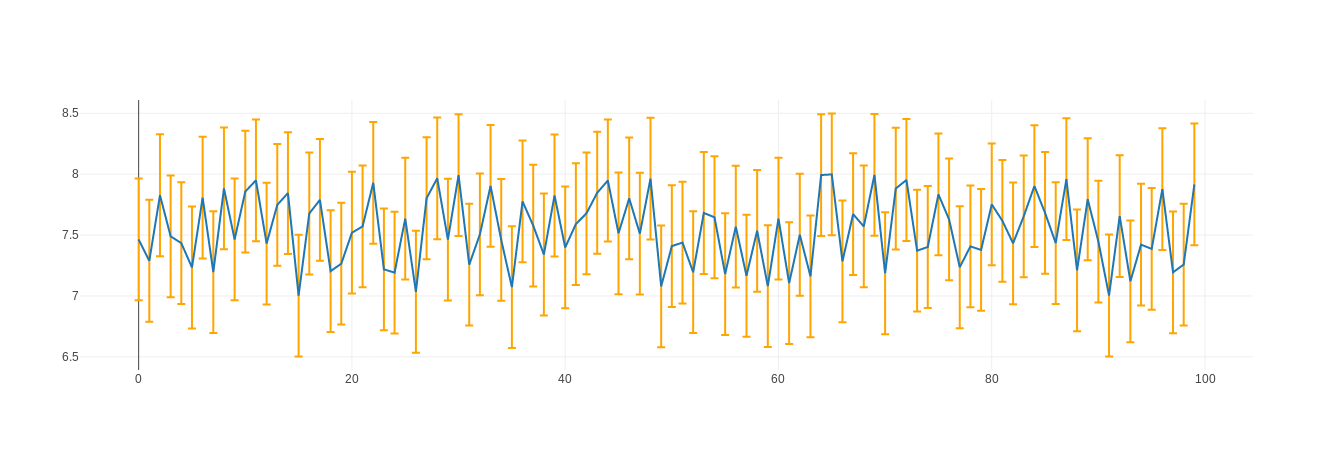

In [6]:
real_distance = 7.5
sensor_noise = 0.5
measurements = np.random.uniform(real_distance - sensor_noise, real_distance + sensor_noise, size=100)
plot_sensor_error(measurements, sensor_noise)

Средната вредност тежи кон вистинската бидејќи одбиравме примероци од рамномерна распределба.

In [7]:
measurements.mean()

7.5404075746445685

Доколку ги преброиме сите податоци и исцртаме на график која вредност колку пати сме ја добиле ќе увидеме дека сите вредности се рамномерно застапени. Овој вид на график се нарекува хистограм.

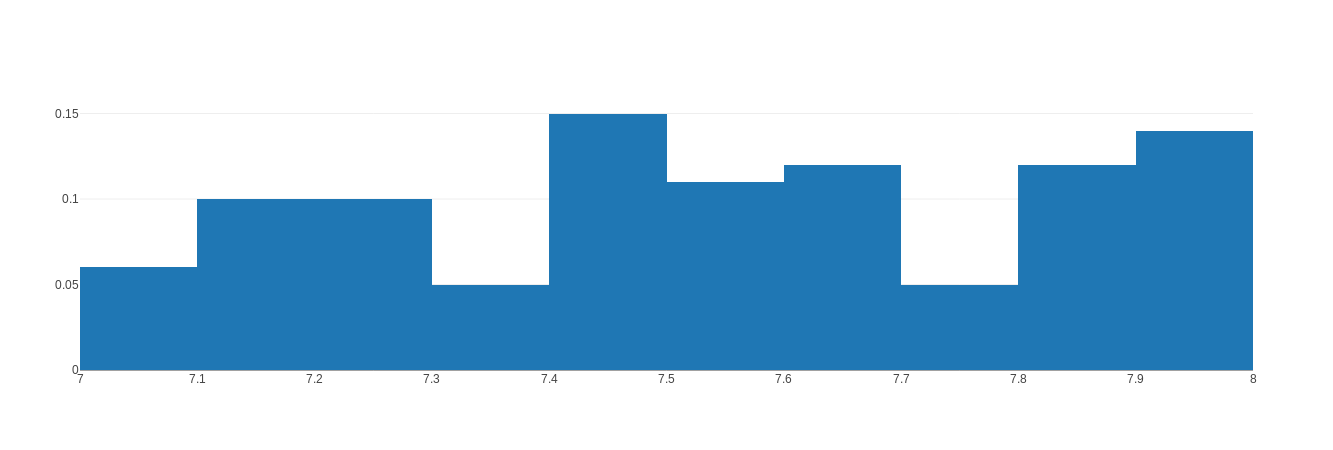

In [8]:
pl.iplot([go.Histogram(x=measurements, histnorm='probability')])

Прашање пред нас е каков е шумот кој го добиваме од сензорот. Во овој пример податоците ги добивме од рамномерна распределба. Во реалноста податоците од сензор можат да имаат изразито различни распределби. Кај најголем дел од сензорите податокот на излезот со поголема веројатност се наоѓа поблиску до вистинската вредност, а со помала веројатност се наоѓа подалеку од точната вредност. Ова значи дека таа распределба не е рамномерна. Во природата највеќе се среќава нормалната распределба, а и многу реални распределби можат да бидат апроксимирани со нормалната распределба. Да го исцртаме истиот график за овојпат нормалн распределба на шумот на сензорот.

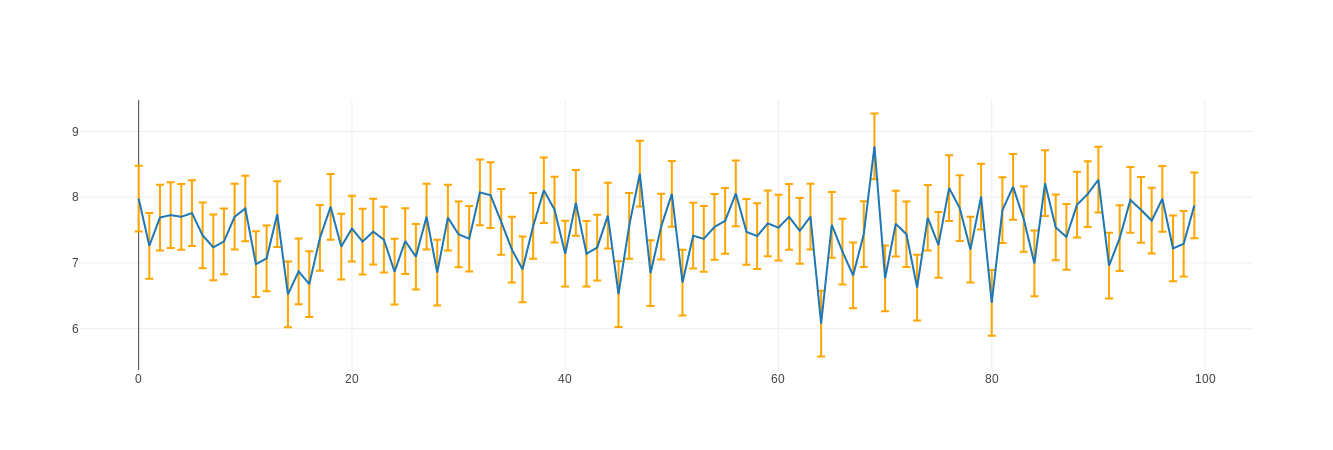

In [9]:
real_distance = 7.5
sensor_noise = 0.5
measurements = np.random.normal(real_distance, sensor_noise, size=100)
plot_sensor_error(measurements, sensor_noise)

Средната вредност тежи кон вистинската бидејќи пак одбиравме примероци од распределба со средна вредност еднаква на точната далечина до ѕидот.

In [10]:
measurements.mean()

7.478851710951115

Хистограмот сега наликува на нормалната распределба.

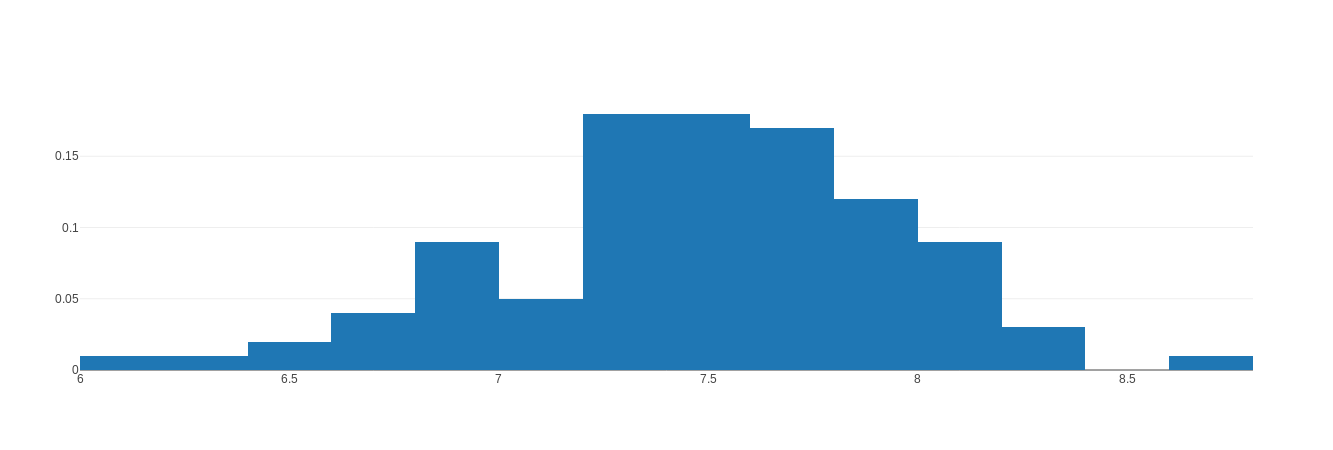

In [11]:
pl.iplot([go.Histogram(x=measurements, histnorm='probability')])

### Што ако се движиме?

Автомобилот не е наменет да стои во место, па немаме време да направиме повеќе мерења за подобро да ја процениме далечината. Останува да веруваме само на тој еден податок кој сме го прибрале во тој еден момент. Наредниот приберен податок се смета за различна далечина бидејќи автомобилот се движи. Дополнителна информација која ќе ни биде од корист е брзината на возилото. Да речеме дека се движиме со константна брзина од 1 m/s кон ѕидот. Моментално нека се наоѓаме на 7.5 метри далечина од ѕидот. Да претпоставиме дека наредното мерење ќе го извршиме по 3 секунди. За овие три секунди очекуваме да поминеме пат од 3 метри бидејќи се движиме со брзина од 1 m/s. Тоа значи дека по 3 секунди очекуваме да сме на 4.5 метри далечина од ѕидот. По 3 секунди прибираме податок од сензорот и отчитуваме вредност 2.5 метри. Ова е голема разлика од нашето предвидување и мерењето и претставува проблем.

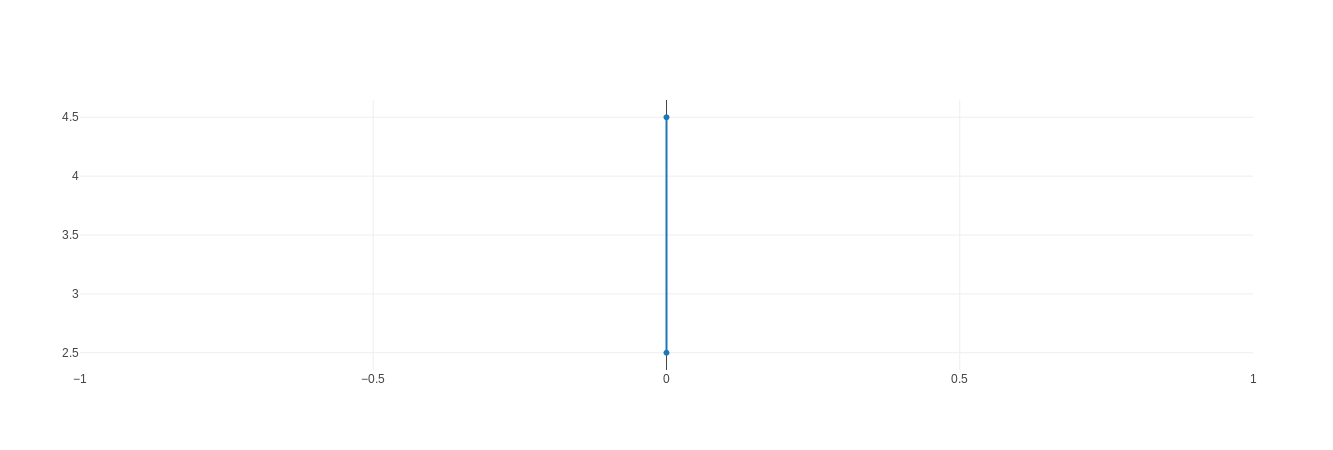

In [12]:
pl.iplot([go.Scatter(x=[0, 0], y=[2.5, 4.5])])

### Клучно прашање: На кого да веруваме?

Да веруваме на нашето предвидување каде од други извори знаеме дека се движиме со брзина од 1 m/s или пак на сензорот? Ако се потпреме исклучиво на податоците од сензорите тогаш губиме значајна информација за брзината на автомобилот. Ако се потпреме исклучиво на нашето предвидување тогаш не ги гледаме сензорите и може скапо да не чини неточната информација за брзината. Најдобро е да се земат и двете вредности, но да се најде начин на кого да се верува колку. Ако сензорот е многу прецизен, а проценката за брзината од 1 m/s ја сметаме малку веродостојна тогаш повеќе се верува на сензорот. Доколку ситуацијата е обратна, сензорот е лош, а предвидувањето е добро, веруваме повеќе на предвидувањето. Во ниеден случај не е добро да се исклучи едниот извор на информации. Сосема логично е подобрената проценка да ја бараме во опсегот помеѓу овие две вредности, предвидувањето и мерењето. На сликата овој опсег е означен со сина отсечка. Најлесен начин да извршиме проценка е преку дефинирање на состојба на верување за нашата моментална позиција. Секое ново мерење ќе придонесува во подобрувањето на нашето верување, а колку всушност ќе придонесува е проблем кој се решава според реалниот проблем кој го решаваме. Во нашиот случај со автомобилот тоа би изгледало вака:
$$проценка = предвидување + \alpha (мерење - предвидување)$$
Оваа равенка го прикажува спојувањето на овие две различни информации. Предвидувањето го одземаме од измерената вредност и добиваме разлика која ќе се придодаде на нашето веќе оформено верување. Константата $\alpha$ е множител кој ќе ни каже на кого колку да веруваме. Ако $\alpha = 1$ тогаш му веруваме исклучиво на мерењето. Ако $\alpha = 0$ тогаш му веруваме исклучиво на предвидувањето. Веќе зборувававме дека овие крајни ситуации не ни се од корист, па затоа ќе поставиме вредност за $\alpha$ помеѓу 0 и 1. Колку е поголемо $\alpha$ толку повеќе се верува на мерењето, и обратно, колку е помало $\alpha$ толку повеќе се верува на предвидувањето. Точната вредност за изборот на $\alpha$ ќе зависи од посакуваното поведение на филтерот. Нека $\alpha = 0.4$. Правиме симулација каде автомобилот се движи со константна брзина, ја мериме неговата далечина до ѕидот со нашиот сензор и го употребуваме нашиот филтер за да ја подобри проценката за вистинската положба на автомобилот.


In [59]:
def alpha_filter(measurements, initial_estimate, velocity, alpha):     
    estimated_depth = initial_estimate
    estimates, predictions = [estimated_depth], [estimated_depth]
    for z in measurements[1:]: 
        dt = 1
        predicted_depth = estimated_depth + velocity * dt
        estimated_depth = predicted_depth + alpha * (z - predicted_depth)

        estimates.append(estimated_depth)
        predictions.append(predicted_depth)

    return estimates, predictions

def plot_alpha_beta_filter(ground_truth, measurements, predictions, estimates):
    marker = dict(size=8, line=dict(width=2))
    trace_ground_truth = go.Scatter(y=ground_truth, name='Точна далечина')
    trace_measurements = go.Scatter(y=measurements, mode='markers', marker=marker, name='Мерење')
    trace_estimates = go.Scatter(y=estimates, name='Проценка')
    trace_predictions = go.Scatter(y=predictions, name='Предвидување')
    pl.iplot([trace_ground_truth, trace_measurements, trace_predictions, trace_estimates])

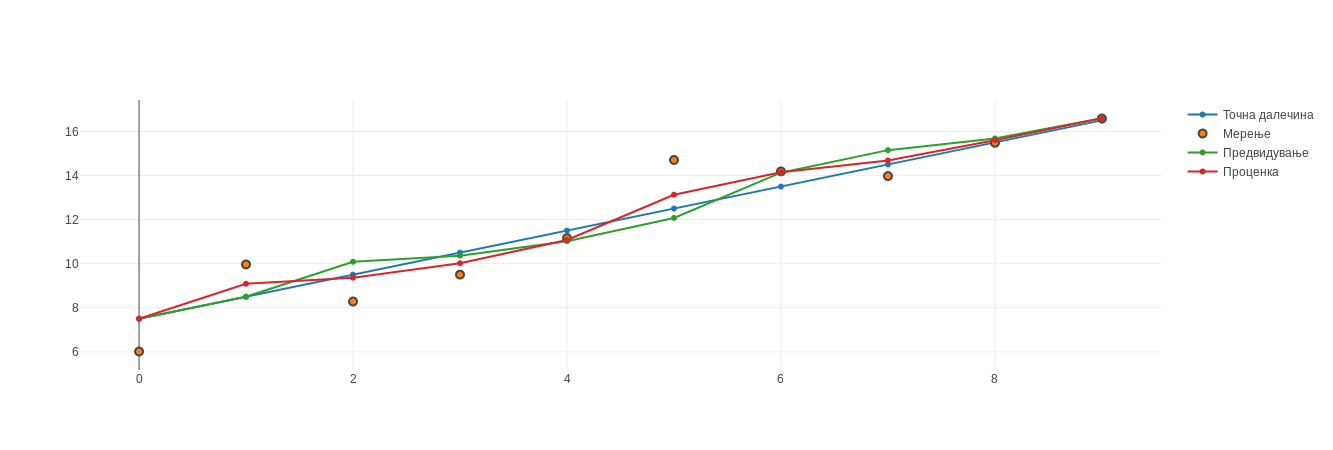

In [66]:
sensor_noise = 1
ground_truth = np.arange(7.5, 17)
measurements = ground_truth + np.random.normal(0, sensor_noise, size=ground_truth.size)
estimates, predictions = alpha_filter(measurements, initial_estimate=7.5, velocity=1, alpha=0.4)
plot_alpha_beta_filter(ground_truth, measurements, predictions, estimates)

Што ако ја погрешиме насоката?

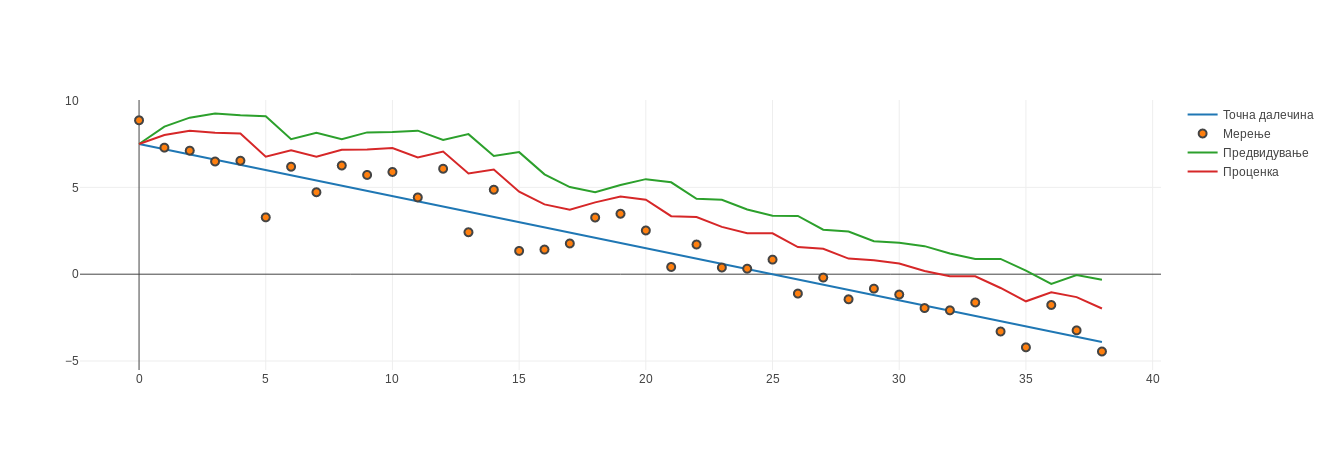

In [70]:
sensor_noise = 1
ground_truth = np.arange(7.5, -4, -0.3)
measurements = ground_truth + np.random.normal(0, sensor_noise, size=ground_truth.size)
estimates, predictions = alpha_filter(measurements, initial_estimate=7.5, velocity=1, alpha=0.4)
plot_alpha_beta_filter(ground_truth, measurements, predictions, estimates)

Од графикот заклучуваме дека филтерот добро функционира доколку ја знаеме брзината на автомобилот. Ако ја погрешиме брзината на автомобилот тогаш правиме големи грешки во предвидувањето, па како последица на тоа проценетата далечина е далеку од вистинската далечина. Може да забележиме дека проценетата далечина се поправа со текот на времето, но колку е полоша првичната претпоставка за брзината, толку е полоша проценетата далечина. Доколку ја погрешиме првичната положба, таа ќе се поправи со текот на времето бидејќи го користиме нашиот филтер.

Воопшто не ни е од корист ваков филтер на кој треба да му кажеме со која брзина се всушност движиме. Што ако брзината се смени? Тогаш соодветно треба да го ажурираме филтерот. Што ако таа постојано се менува? Дали можеме да ја изведеме брзината од измерените податоци? На горната слика може да се видат измерените податоци кои со тек на времето имаат опаѓачки тренд. Не опаѓаат строго монотоно бидејќи постои шум. Наклонот на нивното опаѓање е всушност брзината со која се движи автомобилот. За да пресметаме брзина потребни ни се најмалку две последователни мерења. Во примерот користевме константна брзина цело време. Идејата сега е да ја искористиме таа информација како почетна брзина, а потоа да ја менуваме со текот на времето сѐ додека не ја процениме вистинската брзина на автомобилот. Брзината ќе ја ажурираме со новите мерења на ист начин како што ја ажуриравме положбата.

$$брзина = брзина + \beta\frac{\text{мерење - предвидена положба}}{\text{временска единица}}$$

Тука $\beta$ е константа која кажува како промената на измерените податоци со текот на време ќе влијае на нашата проценка на брзината со која се движи автомобилот. Колку е поголема разликата помеѓу едно мерење тогашната предвидена положба, толку посилно ќе делува оваа разлика врз брзината за да ја поправи. Да го симулираме ова. Ќе ја симулираме истата опаѓачка патека од погоре, но овој пат ќе зададеме почетна брзина наместо константна брзина за цело време. Дополнително ја одредуваме и вредноста на $\beta$.

In [67]:
def alpha_beta_filter(measurements, initial_estimate, initial_velocity, alpha, beta):     
    estimated_depth = initial_estimate
    estimates, predictions = [estimated_depth], [estimated_depth]
    velocity = initial_velocity
    for z in measurements[1:]:
        dt = 1
        predicted_depth = estimated_depth + velocity * dt
        velocity += beta * (z - predicted_depth) / dt
        estimated_depth = predicted_depth + alpha * (z - predicted_depth)

        estimates.append(estimated_depth)
        predictions.append(predicted_depth)

    return estimates, predictions

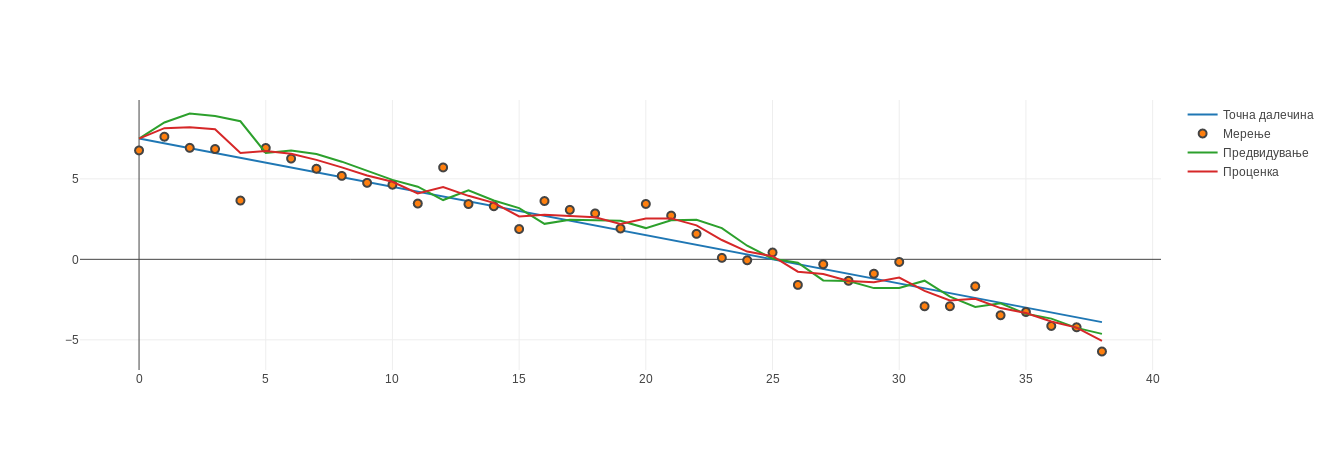

In [75]:
sensor_noise = 1
ground_truth = np.arange(7.5, -4, -0.3)
measurements = ground_truth + np.random.normal(0, sensor_noise, size=ground_truth.size)
estimates, predictions = alpha_beta_filter(measurements, initial_estimate=7.5, initial_velocity=1, alpha=0.4, beta=0.1)
plot_alpha_beta_filter(ground_truth, measurements, predictions, estimates)

Тука може да се види како филтерот почнува со работа со изразено погрешна првична проценка за брзината. Бидејќи сега работи АБ филтерот може да се види како проценката за брзина се менува со текот на времето.

Овој филтер е основа на многу филтри. Разликата е само во моделот на процесот кој се користи и како се менуваат $\alpha$ и $\beta$ вредностите. Тука ги држиме константни, а други филтри кои се темелат на оваа основа динамички ги менуваат истите. За овој пример треба да ги нагодиме соодветно овие вредности во зависност од природата на процесот. Но, како што можеме да видиме, нагодување на овие константи за секој процес посебно може да биде многу проблематично, па дури и невозможно едни исти вредности цело време да бидат користени. Затоа повеќе користени се филтрите кои динамички ги менуваат овие константи.

### Што ако се движиме и застанеме?

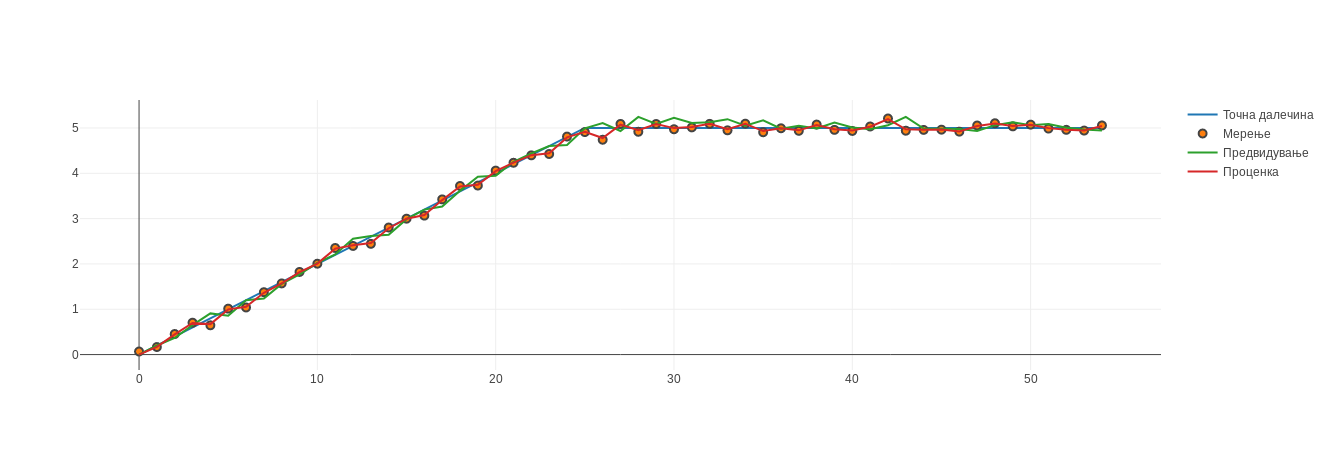

In [100]:
sensor_noise = 0.1
ground_truth = np.hstack((np.arange(0, 5, 0.2), 5*np.ones(30)))
measurements = ground_truth + np.random.normal(0, sensor_noise, size=ground_truth.size)
estimates, predictions = alpha_beta_filter(measurements, initial_estimate=0, initial_velocity=0.2, alpha=0.9, beta=0.1)
plot_alpha_beta_filter(ground_truth, measurements, predictions, estimates)

Која вредност на $\alpha$ би ја одбрале тука?

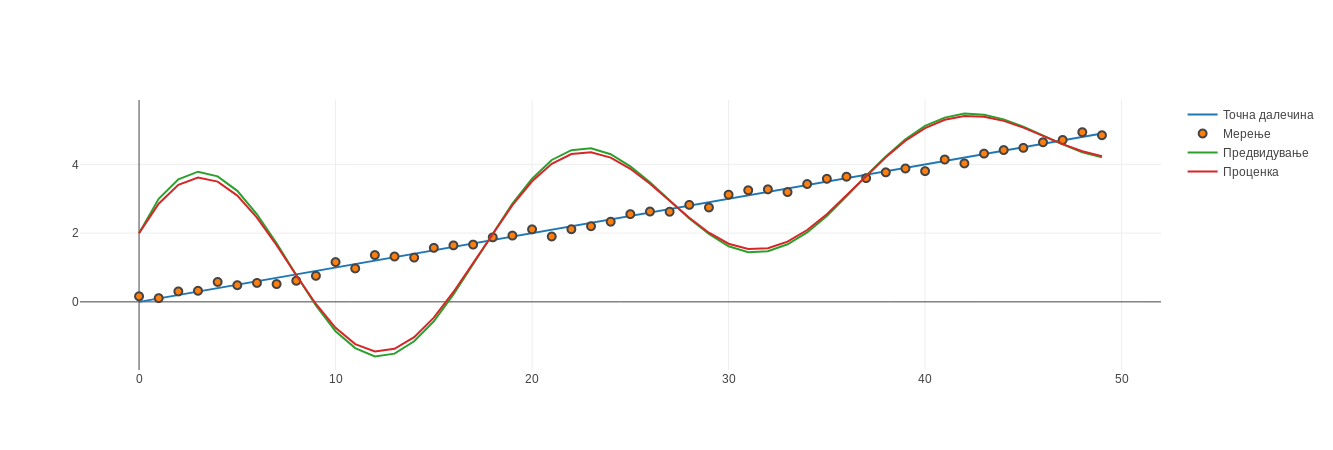

In [107]:
sensor_noise = 0.1
ground_truth = np.arange(0, 5, 0.1)
measurements = ground_truth + np.random.normal(0, sensor_noise, size=ground_truth.size)
estimates, predictions = alpha_beta_filter(measurements, initial_estimate=2, initial_velocity=1, alpha=0.05, beta=0.1)
plot_alpha_beta_filter(ground_truth, measurements, predictions, estimates)